# Multiclass Perceptron

## Loading required 

In [1]:
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



## Loading the required data

In [2]:
# loading data from csv file
train = read.csv("Task2C_train.csv",header=TRUE)
test = read.csv("Task2C_test.csv",header=TRUE)

# shuffle the train and test data
set.seed(200)
train <- train[sample(nrow(train)),]
test <- test[sample(nrow(test)),]

# taking train data and test data
train.data <- train[,-ncol(train)]
train.label <- as.vector(train[,ncol(train)])

test.data <-  test[,-ncol(test)]
test.label <- as.vector(test[,ncol(test)])

### Finding number of classifiers 

In [3]:
# finding out number of classifiers in a the data
K <- nlevels(factor(train[,ncol(train)]))
print(K)

[1] 3


### Auxillary functions

In [4]:
# auxillary function to find error and update weights 
error <- function(Phi,W1,W2,W3,index,label,train.data){
    # Three binary classifiers
    Y_1 = data.frame(Phi%*%W1[index, ])
    Y_2 = data.frame(Phi%*%W2[index, ])
    Y_3 = data.frame(Phi%*%W3[index, ])
    # Predicted class
    T = matrix(,nrow=nrow(Phi),ncol=1)
    for(k in 1:nrow(Phi)){
        T[k,] <- compare(Y_1[k,],Y_2[k,],Y_3[k,])
    }
    # returning the error
    return(sum(T != label)/nrow(train.data))
}

# auxillary function to predict the class
compare <- function(y1,y2,y3){
    if(y1 > y2) {
        if(y1 > y3) {T <- 'C1'}
            else{ T <- 'C3'}
    }
    else{
        if(y2 > y3) {T <- 'C2'}
            else{ T <- 'C3'}
    }
    return(T)
}




In [5]:
# create a basis function
Phi <- cbind(1,train.data)

#intializing the required parameters
Phi <- as.matrix(Phi)
eta <- 0.1 # Learning rate
epsilon <- 0.001 # Stoping criterion
tau.max <- 100 # Maximum number of iterations

# initializing k weight vectors

w1 = matrix(,nrow=tau.max,ncol=ncol(Phi))
w2 = matrix(,nrow=tau.max,ncol=ncol(Phi))
w3 = matrix(,nrow=tau.max,ncol=ncol(Phi))

w1[1,] <- runif(ncol(Phi)) # Random initial values for w1 weight vector
w2[1,] <- runif(ncol(Phi)) # Random initial values for w2 weight vector
w3[1,] <- runif(ncol(Phi)) # Random initial values for w3 weight vector

tau <- 1 # iteration counter 
terminate <- FALSE # termination status


# loop
 while(!terminate){
 # test errofor every 5 datapoints
 test_error = matrix(,nrow=round(nrow(train.data)/5,digits=0),ncol=2)
     l = 1 # test_error iterator
     # every datapoint
     for(i in 1:nrow(train.data)){
         if(tau == tau.max){break}
         t =''
         y1 <- (w1[tau,]%*%Phi[i,])
         y2 <- (w2[tau,]%*%Phi[i,])
         y3 <- (w3[tau,]%*%Phi[i,])

         t <- compare(y1,y2,y3)
         # condition to check where predicted label is same as train label
         if( t != train.label[i]){
             tau <- tau + 1
             
             pred <- strsplit(t, "")[[1]][2]
             true <- strsplit(train.label[i],"")[[1]][2]

             # updating the weigth vectors
             if(pred == '1'){
             w1[tau,] <- eval(as.name(paste('w',pred,sep='')))[tau-1,] - eta * Phi[i,]
             }else if(pred == '2'){
                 w2[tau,] <- eval(as.name(paste('w',pred,sep='')))[tau-1,] - eta * Phi[i,]
                 } else {
                 w3[tau,] <- eval(as.name(paste('w',pred,sep='')))[tau-1,] - eta * Phi[i,]
            }
            if(true == '1') {
             w1[tau,] <- eval(as.name(paste('w',true,sep='')))[tau-1,] + eta * Phi[i,]
            }else if(true == '2'){
                 w2[tau,] <- eval(as.name(paste('w',true,sep='')))[tau-1,] + eta * Phi[i,]
                 } else {
                 w3[tau,] <- eval(as.name(paste('w',true,sep='')))[tau-1,] + eta * Phi[i,]
            } 
         for( j in 1:3){
             if (is.na(eval(as.name(paste('w',j,sep='')))[tau,1])){
                 if(j==1) {
                    w1[tau,] <- eval(as.name(paste('w',j,sep='')))[tau-1,]
                        }else if(j==2){
                    w2[tau,] <- eval(as.name(paste('w',j,sep='')))[tau-1,]
                         } else {
                    w3[tau,] <- eval(as.name(paste('w',j,sep='')))[tau-1,]
                  } 
             }
         }

     }
             
    # condition to find the test_error for every 5 data points
    if(i%%5 == 0){
             Phi_t = as.matrix(cbind(1,test.data))
             test_error[l,2] <- error(Phi_t,w1,w2,w3,tau,test.label,test.data)
             test_error[l,1] <- i
             l = l+1
        }
             
    # recalculate termination conditions
    if (tau >= 2){
    terminate <- tau >= tau.max | 
        abs(error(Phi,w1,w2,w3,tau,train.label,train.data) - error(Phi,w1,w2,w3,tau-1,train.label,train.data)) <= epsilon 
    }
    else{
     terminate <- tau >= tau.max | 
        abs(error(Phi,w1,w2,w3,tau,train.label,train.data) - 0) <= epsilon   
    }

 }
}
# final updated weigths
w1 <- w1[1:tau,]
w2 <- w2[1:tau,]
w3 <- w3[1:tau,]

## plotting test  error for every 5 data points

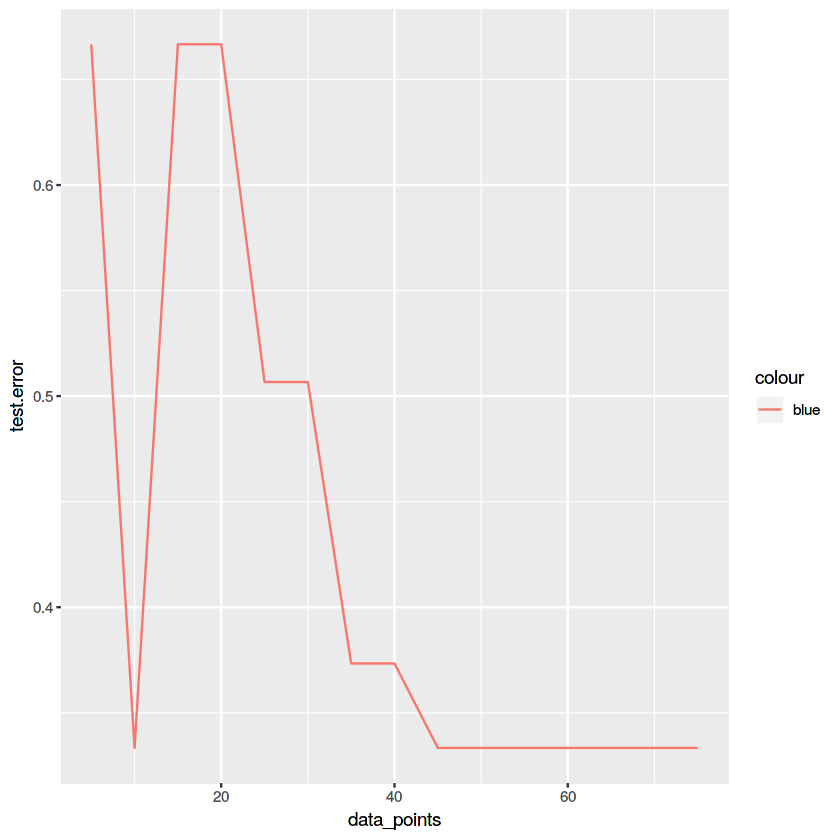

In [6]:
test_error = data.frame(test_error)
colnames(test_error)<- c('data_points','test.error')

y <- ggplot(test_error,aes(x=data_points,y=test.error))+geom_line(aes(color='blue'))
plot(y)

## one vs one classifier

###  initializing the required data

In [7]:
# train data for C1,C2 classifier
train1 <- filter(train,y %in% c('C1','C2'))
Phi1 <- as.matrix(cbind(1,train1[,-ncol(train1)]))

# train data for C2,C3 classifier
train2 <- filter(train,y %in% c('C2','C3'))
Phi2 <- as.matrix(cbind(1,train2[,-ncol(train2)]))

# train data for C3,C1 classifier
train3 <- filter(train,y %in% c('C3','C1'))
Phi3 <- as.matrix(cbind(1,train3[,-ncol(train3)]))

eta <- 0.1 # Learning rate

# maximum iterations
tau.max <- 50

# initializing k weight vectors
w12 = matrix(0,nrow=tau.max,ncol=ncol(Phi1))
w23 = matrix(0,nrow=tau.max,ncol=ncol(Phi2))
w31 = matrix(0,nrow=tau.max,ncol=ncol(Phi3))

# randomly assigning weights
w12[1,] <- runif(ncol(Phi1)) # Random initial values for w1 weight vector
w23[1,] <- runif(ncol(Phi2)) # Random initial values for w2 weight vector
w31[1,] <- runif(ncol(Phi3)) # Random initial values for w3 weight vector

# train labels
T1 <- ifelse(train1[,ncol(train1)] == 'C1', +1,-1) # Convention for class labels
T2 <- ifelse(train2[,ncol(train2)] == 'C2', +1,-1) # Convention for class labels
T3 <- ifelse(train3[,ncol(train3)] == 'C3', +1,-1) # Convention for class labels

### weights generation

In [8]:
# creating weights
weights <- function(Phi,w,T){
    # intial values
    terminate <- FALSE
    eta <- 0.1 # Learning rate
    epsilon <- 0.001 # Stoping criterion
    tau <- 1
    iter <- 1
while(!terminate){
    # for each iteration
    for (i in 1:nrow(Phi)){
        # condition to break loop
        if (tau == tau.max) {break}
        # look for missclassified samples
        if ((w[tau,]%*%Phi[i,])*T[i]<0){

            # update tau counter
            tau <- tau +1

            # update the weights
            w[tau,] <- w[tau-1,] + eta * Phi[i,] * T[i]
    
        } 
    }
    eta <- eta*0.99 # decreasing eta
    # iter is to stop the loop
    iter <- iter + 1
     # recalculate termination conditions
    terminate <- tau >= tau.max | 
        abs(sum((Phi%*%w[tau,])*T<0)/nrow(Phi) - sum((Phi%*%w[tau-1,])*T<0)/nrow(Phi)) <= epsilon | iter > 500

    }
    w <- w[1:tau,]
 return(w[nrow(w),]) # returns the last row
}

# three weights 
w1 <- weights(Phi1,w12,T1)
w2 <- weights(Phi2,w23,T2)
w3 <- weights(Phi3,w31,T3)

### classifying the test data

In [9]:
#  basis function 
Phi_t <- as.matrix(cbind(1,test.data))
# matrix to save predicted classes
t <- matrix(0,nrow=nrow(test.data),ncol=1)

# for each test data point
for( i in 1:nrow(test.data)){
    
    # computing class function
    y12 <- (w1%*%Phi_t[i,])
    y23 <- (w2%*%Phi_t[i,])
    y31 <- (w3%*%Phi_t[i,])
    
    # condition to classify the test datapoint
    if (y12 > 0){y1 = 'C1'}
    else{y1 = 'C2'}
    
    # conditon to classify the test datapoint
    if(y23 > 0){y2 = 'C2'}
    else{y2 = 'C3'}
    
    # condition to classify the test datapoint
    if(y31 > 0){y3 = 'C3'}
    else{y3 = 'C1'}
    
    # prediction of all classifiers
    pred <- c(y1,y2,y3)
    
    # condition to find confusion event
    r <-as.matrix(sort(table(pred),decreasing=TRUE)[1])
    if(r[1] == 2){t[i,1] <-  rownames(r)}
    else{t[i,1] <- 'Confusion event'}

}

### checking for confusion event

In [10]:
if('Confusion event' %in% t[,1]) {print('Yes,confusion event exist')}

** No output from above cell it means NO confusion event. I always expected a confusion event, but here data is perfectly separated that you won't find the confusion event.**